In [1]:
#import the all required libraries/ basic

In [2]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the dataset

In [4]:
dataset = pd.read_excel('E-com_Data.xlsx')
dataset.head(1)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN


In [5]:
# how my dataset looks 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
# when we see in above data the 'Sold at set', 'Reason of return', and 'Cancelled_status' are having so many missing values.
# so to know its in percentage we go with the code as . 
dataset.isnull().sum()/len(dataset)*100 # i will get in the form of percentage

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [7]:
# now we see in above as very clearly that last 3 columns are having nearly missing values close to 100 percent.need to drop.
# if we look into 'CustomerID' there is 25 percent missing values , normally if we take threshold as 25% and missing vlaue
#   crosses above 25% then that also column we have to drop ,but here the colum 'CustomerID' is very important looking to 
#   objective of data , so we cant drop it , instead we could drop only 25% mssing data , remaining we can use for project.
#   here we are talking about customer so, 'CustomerID' we need .


# if we are doing supervised learning model then there we are getting above 25% value as missing ,we need to drop it .
# here we are handling with the unsupervised model so we need to go with the preferences of dimensions.

In [8]:
# we need to check unique values 
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [9]:
# do we have any duplicate values
dataset.head(20)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [10]:
dataset.duplicated().sum()

9

In [11]:
# there are some spell and other mistakes to correct it 

In [12]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [13]:
# now, i want to modify or rename column names who are mispelled.
dataset=dataset.rename(columns = {'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

In [14]:
# iloc = column wise
#loc = row wise
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [15]:
dataset = dataset.drop_duplicates(ignore_index = True) # dropping the duplicated rows

In [16]:
dataset.duplicated().sum()

0

In [17]:
# handelling missing data
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [18]:
dataset = dataset.dropna(subset = ['CustomerID'])

In [19]:
dataset = dataset.iloc[:,0:9]

In [20]:
dataset.isnull().sum()

CustomerID           0
Item Code            0
InvoiceNo            0
Date                 0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  int64         
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.8+ MB


In [22]:
#now, my objective is to find RFM = Recency ,Frequency , Monetary.
# recency = we need date , how many times they came , how recently the customer is .
# frequency = this gives information like , how frequently the customer has came, so Invoice no helps me to get this information.
# monetary = how much a customer is spending, Price gives the information about how customer is potential .
# we need column to get RFM are 'InvoiceNO','Date','Price'.


In [23]:
dataset['Date_1'] = dataset['Date']
# this I done because one Date can use for recency and another for frequency .

In [24]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10


In [25]:
# my purpose to target is
# Recency = latest date - last invoice date.
# Frequency = count of customerID / invoiceNO / date of purchase by customers.
# Monetary = Sum of Total Price by Individual customer.
import datetime as dt

In [26]:
dataset.tail()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Date_1
537936,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,2017-11-28
537937,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,2017-11-27
537938,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,2016-12-21
537939,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,2016-12-21
537940,21.0,14693,363890,2016-12-17,13,12:58:00,380.0,4940.0,Location 8,2016-12-17


In [27]:
# what is the observation in above output , like if we see the date column , in that year if we see ,are not arranged 
#  in proper sequence or like somewhere 2016 is and somewhere 2017 , its notlike in proper order.
# sp to get that we have to sort ,and for sorting purpose we have to go with the describe() funcn.

In [28]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-12-02 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [29]:
#first date = 2016-12-02
# last date =  2017-12-19
latest_date = dt.datetime(2017,12,20)
RFMscores= dataset.groupby('CustomerID').agg({'Date_1':lambda x:(latest_date-x.max()).days,
                                                'Date':lambda x:x.nunique(),
                                                'Price':lambda x:x.sum()})
RFMscores['Date'] = RFMscores['Date'].astype(int)
RFMscores.rename(columns = {'Date_1':'Recency','Date':'Frequency','Price':'Monitary'},inplace=True)

#RFMscores.reset_index.head()



In [30]:
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monitary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,19,10,176613.0
3,5.0,311,7,41976.0
4,6.0,37,42,151822.0


In [31]:
RFMscores.Recency.describe() #min recency is the good customer

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [32]:
RFMscores.Frequency.describe() # max Frequency is good customer.

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [33]:
RFMscores.Monitary.describe() # max monitary is good customer.

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monitary, dtype: float64

In [34]:
#split into 3 segments using Quantile methods
quantiles = RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monitary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [35]:
def Rscoring(x,p,d): # for Recency score.
    if x<=d[p][0.25]:
        return 1 # very good customer
    elif x<=d[p][0.50]:
        return 2 # ok k
    elif x<=d[p][0.75]:
        return 3 # worst customer
    else:
        return 4 # very worst customer  
    
def FnMscoring(x,p,d): # for Monitary and Frequency score.
    if x<=d[p][0.25]:
        return 4 # very worst customer
    elif x<=d[p][0.50]:
        return 3 # less worst customer
    elif x<=d[p][0.75]:
        return 2 # ok ok customer
    else:
        return 1 # very good customer/ prime customer

    
#x = variable , p = point(actual value) , d = data


In [36]:
#now , creatig variable as  R ,F, M for data RFMscoring
RFMscores['R'] = RFMscores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
RFMscores['F'] = RFMscores['Frequency'].apply(FnMscoring, args=('Frequency',quantiles,))
RFMscores['M'] = RFMscores['Monitary'].apply(FnMscoring, args=('Monitary',quantiles,))

In [37]:
RFMscores # this is what the ouput where I can divide the customers into classes like very good, avg ,bad. by looking to
           #  the R,F,and M scores.

,Recency,Frequency,Monitary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,3,2,1
4.0,19,10,176613.0,2,3,2
5.0,311,7,41976.0,4,4,3
6.0,37,42,151822.0,2,1,2
...,...,...,...,...,...,...
4368.0,278,7,20480.0,4,4,4
4369.0,181,6,10774.0,4,4,4
4370.0,9,11,24962.0,1,3,4


In [38]:
# now I can play with the data like , I can create new column where I can combine all three RFM .and could analyse which are
# which are the best customers .
RFMscores['RFMgroup'] = RFMscores.R.map(str)+RFMscores.F.map(str)+RFMscores.M.map(str)
RFMscores['RFMscore'] = RFMscores[['R','F','M']].sum(axis=1)

In [39]:
RFMscores.head()

,Recency,Frequency,Monitary,R,F,M,RFMgroup,RFMscore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,3,2,1,321,6
4.0,19,10,176613.0,2,3,2,232,7
5.0,311,7,41976.0,4,4,3,443,11
6.0,37,42,151822.0,2,1,2,212,5


In [40]:
# further to understand it in a very clear way we can classify it into Diamond, Gold , Platinum ,Silver.
Loyality_level = ['Diamond','Gold','Platinum','Silver']
score_cuts = pd.qcut(RFMscores.RFMscore,q=4 , labels=Loyality_level)
RFMscores['Loyality_level'] = score_cuts.values
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monitary,R,F,M,RFMgroup,RFMscore,Loyality_level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Gold
2,4.0,19,10,176613.0,2,3,2,232,7,Gold
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond


# use k-means algorithm

In [41]:
#as we want only data of R,F,M ,so to extract that mush data we have to create new variable.
RFMscores1 = RFMscores.iloc[:,1:4]
RFMscores1.head()
#featured scaling required to bulid k-means cluster
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(RFMscores)

,Frequency,Monitary,R
CustomerID,,,
2.0,63,553704.0,1
3.0,18,257404.0,3
4.0,10,176613.0,2
5.0,7,41976.0,4
6.0,42,151822.0,2


In [42]:
#featured scaling required to bulid k-means cluster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMscores1)

In [43]:
scaled_data

array([[ 1.05990701,  0.3777193 , -1.32460945],
       [-0.27973676,  0.03204302,  0.45339256],
       [-0.51789565, -0.06221123, -0.43560845],
       ...,
       [-0.48812579, -0.23913379, -1.32460945],
       [ 3.11402747,  0.0591138 , -1.32460945],
       [-0.13088745,  0.03836156, -0.43560845]])

In [44]:
# as we see above data is getting me in the form of array , but we want in dataframe formatt. so
scaled_data = pd.DataFrame(scaled_data,index=RFMscores1.index,columns=RFMscores1.columns)
scaled_data

,Frequency,Monitary,R
CustomerID,,,
2.0,1.059907,0.377719,-1.324609
3.0,-0.279737,0.032043,0.453393
4.0,-0.517896,-0.062211,-0.435608
5.0,-0.607205,-0.219285,1.342394
6.0,0.434740,-0.091133,-0.435608
...,...,...,...
4368.0,-0.607205,-0.244363,1.342394
4369.0,-0.636975,-0.255686,1.342394
4370.0,-0.488126,-0.239134,-1.324609


In [45]:
# building the k-means cluster .
# to find out the no.of clusters/kValue we need is to go by ELBOW METHOD, here we are going .

ELBOW METHOD

In [46]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square.

for i in range(1,15):
    KM = KMeans(n_clusters= i, init='k-means++',max_iter=1000,random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [47]:
wcss # this I got the 15 clusters , now out of this I wnt best one, 

[13047.000000000007,
 8752.858658092344,
 5846.444123535328,
 3821.430365299819,
 2934.7835324554603,
 2400.264636508382,
 1941.921634496869,
 1644.6650994363233,
 1384.1373896621124,
 1220.8300147741397,
 1082.9203415023835,
 940.5244601797789,
 841.3693064112153,
 778.047428485762]

In [48]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

<AxesSubplot:>

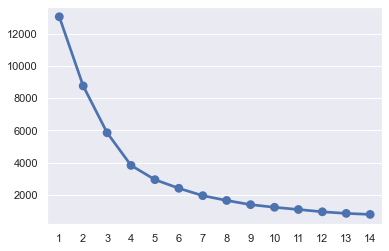

In [49]:
sns.pointplot(a,  wcss)

In [50]:
# here is what in above plot we got 4 as kValue ,where it is actual turning as we observe clearly.

In [51]:
KM = KMeans(n_clusters= 4, init='k-means++',max_iter=1000,random_state=1)
y_Kmeans = KM.fit_predict(scaled_data)
y_Kmeans
    

array([0, 1, 0, ..., 0, 2, 0])

In [52]:
RFMscores.reset_index()

,CustomerID,Recency,Frequency,Monitary,R,F,M,RFMgroup,RFMscore,Loyality_level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Gold
2,4.0,19,10,176613.0,2,3,2,232,7,Gold
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,7,20480.0,4,4,4,444,12,Silver
4345,4369.0,181,6,10774.0,4,4,4,444,12,Silver
4346,4370.0,9,11,24962.0,1,3,4,134,8,Gold
4347,4371.0,4,132,280608.0,1,1,1,111,3,Diamond


In [53]:
RFMscores['cluster'] = KM.labels_

In [54]:
RFMscores

,Recency,Frequency,Monitary,R,F,M,RFMgroup,RFMscore,Loyality_level,cluster
CustomerID,,,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3,Diamond,0
3.0,77,18,257404.0,3,2,1,321,6,Gold,1
4.0,19,10,176613.0,2,3,2,232,7,Gold,0
5.0,311,7,41976.0,4,4,3,443,11,Silver,1
6.0,37,42,151822.0,2,1,2,212,5,Diamond,0
...,...,...,...,...,...,...,...,...,...,...
4368.0,278,7,20480.0,4,4,4,444,12,Silver,1
4369.0,181,6,10774.0,4,4,4,444,12,Silver,1
4370.0,9,11,24962.0,1,3,4,134,8,Gold,0


In [56]:
RFMscores.reset_index()
RFMscores

,Recency,Frequency,Monitary,R,F,M,RFMgroup,RFMscore,Loyality_level,cluster
CustomerID,,,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3,Diamond,0
3.0,77,18,257404.0,3,2,1,321,6,Gold,1
4.0,19,10,176613.0,2,3,2,232,7,Gold,0
5.0,311,7,41976.0,4,4,3,443,11,Silver,1
6.0,37,42,151822.0,2,1,2,212,5,Diamond,0
...,...,...,...,...,...,...,...,...,...,...
4368.0,278,7,20480.0,4,4,4,444,12,Silver,1
4369.0,181,6,10774.0,4,4,4,444,12,Silver,1
4370.0,9,11,24962.0,1,3,4,134,8,Gold,0
